In [118]:
import dlib
import cv2
face_detector = dlib.get_frontal_face_detector()
img = cv2.imread('./Dataset/face/hand2.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
faces = face_detector(img)
size = 80

# print("{} faces are detected.".format(len(faces)))
for f in faces:
    print("left, top, right, bottom : ", f.left(), f.top(), f.right(), f.bottom())
    # cv2.rectangle(img, (f.left(), f.top()), (f.right(), f.bottom()), (0,0,255),2)
    cv2.rectangle(img, ((f.left()-size), (f.top()-size)), ((f.right()+size),(f.bottom()+size)), (0,0,255),2)

# win = dlib.image_window()
# win.set_image(img)
# win.add_overlay(faces)

crop = img[(f.top()-size):(f.bottom()+size), (f.left()-size):(f.right()+size)]
cv2.imwrite("output.jpg", crop, [cv2.IMWRITE_JPEG_QUALITY, 80])

left, top, right, bottom :  221 109 293 181


True

In [1]:
import dlib
import cv2
import glob
from PIL import Image

face_detector = dlib.get_frontal_face_detector()
crop_count = 0
data_path = './Dataset/Train/'

#데이터 로드
face_set = glob.glob('./Dataset/face/*.jpg')

# img = cv2.imread('./Dataset/face/hand1.jpg')
for i in range(len(face_set)):
    #사이즈 비율 정하기
    img = Image.open(face_set[i])
    width, height = img.size

    #이미지 데이터 1개씩 로드
    img = cv2.imread(face_set[i])
    img_area = width * height

    #얼굴 디텍트
    faces = face_detector(img,1)
    
    #디텍트 된 얼굴 수에 따른 반응 설정
    if len(faces) >= 1:
        print("얼굴 검출 성공 =>", face_set[i])
        for i in range(len(faces)):
            # print("left, top, right, bottom : ", f.left(), f.top(), f.right(), f.bottom())

            # 얼굴 크롭할 비율 정하기
            # width = abs(faces[i].left() - faces[i].right())
            # height = abs(faces[i].top() - faces[i].bottom())
            # area = width * height
            # # print('img_area',img_area)
            # # print('area',area)
            # # size = int((img_area/area)*3)
            size = 0

            crop = img[(faces[i].top()-size):(faces[i].bottom()+size), (faces[i].left()-size):(faces[i].right()+size)]
            file_name = str(crop_count)+".jpg"
            data_path_a = data_path + file_name
            #이미지 크기 조정
            crop = cv2.resize(crop, (440, 400), interpolation = cv2.INTER_CUBIC)
            cv2.imwrite(data_path_a, crop)
            crop_count += 1

    elif len(faces) == 0:
            print('얼굴 검출 실패 =>',face_set[i])
            pass
        
print(len(face_set),'장의 사진 중',crop_count,'개의 얼굴 검출, Crop 완료')



얼굴 검출 성공 => ./Dataset/face\apink1.jpg
얼굴 검출 성공 => ./Dataset/face\apink2.jpg
얼굴 검출 성공 => ./Dataset/face\golf.jpg
얼굴 검출 성공 => ./Dataset/face\hand1.jpg
얼굴 검출 성공 => ./Dataset/face\hand2.jpg
얼굴 검출 성공 => ./Dataset/face\kimgunwoo.jpg
얼굴 검출 실패 => ./Dataset/face\p1.jpg
얼굴 검출 성공 => ./Dataset/face\p2.jpg
얼굴 검출 성공 => ./Dataset/face\p3.jpg
9 장의 사진 중 14 개의 얼굴 검출, Crop 완료


In [106]:
a = cv2.imread('./Dataset/face/apink1.jpg')

In [78]:
img = cv2.imread(face_set[8])
faces = face_detector(img)
len(faces)

2

In [248]:
import dlib
import cv2
import glob
from PIL import Image, ImageOps
import numpy as np

face_detector = dlib.get_frontal_face_detector()
crop_count = 0
data_path = './Dataset/Train/'
predictor_path = './shape_predictor_68_face_landmarks.dat'
predictor = dlib.shape_predictor(predictor_path)


def resize_with_padding(img, expected_size):
    img.thumbnail((expected_size[0], expected_size[1]))
    # print(img.size)
    delta_width = expected_size[0] - img.size[0]
    delta_height = expected_size[1] - img.size[1]
    pad_width = delta_width // 2
    pad_height = delta_height // 2
    padding = (pad_width, pad_height, delta_width - pad_width, delta_height - pad_height)
    return ImageOps.expand(img, padding)

#데이터 로드
face_set = glob.glob('./Dataset/face/*.jpg')

for i in range(len(face_set)):
    #사이즈 비율 정하기
    img = Image.open(face_set[i])
    width, height = img.size

    #이미지 데이터 1개씩 로드
    img = cv2.imread(face_set[i])
    
    #얼굴 디텍트
    faces = face_detector(img,1)
    
    #디텍트 된 얼굴 수에 따른 반응 설정
    if len(faces) >= 1:
        print("얼굴 검출 성공 =>", face_set[i])
        for i in range(len(faces)):
            size = 0

            crop = img[(faces[i].top()-size):(faces[i].bottom()+size), (faces[i].left()-size):(faces[i].right()+size)]

                # 이제부터 인식된 얼굴 개수만큼 반복하여 얼굴 윤곽을 표시할 것이다. 
            for k, d in enumerate(faces):
                # k 얼굴 인덱스
                # d 얼굴 좌표
                print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(k, d.left(), d.top(), d.right(), d.bottom()))

                shape = predictor(img, d)
                print("Part 0: {}, Part 1: {} ...".format(shape.part(0),shape.part(1)))

                #create list to contain landmarks
                landmark_list = []

                # append (x, y) in landmark_list
                for p in shape.parts():
                    landmark_list.append([p.x, p.y])
                    if p.x == shape.parts()[33].x and p.y == shape.parts()[33].y:
                        cv2.circle(img, (p.x, p.y), 1, (0, 0, 255), -1)
                    else:
                        cv2.circle(img, (p.x, p.y), 1, (0, 255, 0), -1)

                file_name = str(crop_count)+".jpg"
                data_path_a = data_path + file_name
                pil_crop = Image.fromarray(crop.astype('uint8'), 'RGB')
                pil_crop = resize_with_padding(pil_crop, (440,400))
                # crop = cv2.resize(crop, (440, 400), interpolation = cv2.INTER_AREA)

            cv2.imwrite(data_path_a, crop)
            crop_count += 1

    elif len(faces) == 0:
            print('얼굴 검출 실패 =>',face_set[i])
            pass
    
print(len(face_set),'장의 사진 중',crop_count,'개의 얼굴 검출, Crop 완료')

얼굴 검출 성공 => ./Dataset/face\apink1.jpg
Detection 0: Left: 227 Top: 101 Right: 279 Bottom: 153
Part 0: (230, 116), Part 1: (230, 122) ...
얼굴 검출 성공 => ./Dataset/face\apink2.jpg
Detection 0: Left: 262 Top: 72 Right: 337 Bottom: 146
Part 0: (274, 77), Part 1: (270, 85) ...
Detection 1: Left: 695 Top: 211 Right: 757 Bottom: 274
Part 0: (691, 233), Part 1: (690, 241) ...
Detection 2: Left: 11 Top: 260 Right: 73 Bottom: 322
Part 0: (5, 282), Part 1: (6, 290) ...
Detection 3: Left: 463 Top: 190 Right: 506 Bottom: 233
Part 0: (464, 207), Part 1: (464, 212) ...
Detection 0: Left: 262 Top: 72 Right: 337 Bottom: 146
Part 0: (274, 77), Part 1: (270, 86) ...
Detection 1: Left: 695 Top: 211 Right: 757 Bottom: 274
Part 0: (691, 233), Part 1: (691, 241) ...
Detection 2: Left: 11 Top: 260 Right: 73 Bottom: 322
Part 0: (6, 281), Part 1: (6, 290) ...
Detection 3: Left: 463 Top: 190 Right: 506 Bottom: 233
Part 0: (464, 206), Part 1: (463, 211) ...
Detection 0: Left: 262 Top: 72 Right: 337 Bottom: 146
Part 0

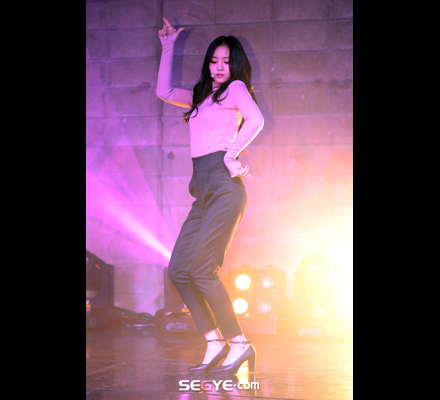

In [245]:
img = Image.open("./Dataset/face/apink1.jpg")
resize_with_padding(img, (440,400))

In [247]:
type(img)

PIL.JpegImagePlugin.JpegImageFile